# **Individual Planning Report**

### **1. Data Description and Summary**

**(1) Observations** \
**players.csv**: 196 rows, each represents one players, uniquely identified by _hashedEmail_.\
**sessions.csv**: 1535 rows, each represents one session.

**(2) Variables** \
**players.csv**: 7 variables
* _experience_: character, indicating player's experience level
* _hashedEmail_: character, unique identifier for each player
* _name_: character, player's name
* _gender_: character, player's gender
* _played_hours_: double, total hour the player has played
* _Age_: double, player's age
* _subscribe_: logical, whether the player subscribes the newsletter

**sessions.csv**: 5 variables 
* _hashedEmail_: character, unique identifier connecting session to a player
* _start_time_: character, start time in Month/Date/Year 
* _end_time_: character, end time in Month/Date/Year
* _original_start_time_: double
* _original_end_time_: double

**(3) Potential Issues with the data sets**
* Missing data: Some observations contain missing values.
* Unuseful variables: _hashedEmail_ is used to join the two data sets, but is not useful for prediction.
* Inconsistent formatting: _start_time_ and _original_start_time_, _end_time_ and _original_end_time_ are in different formatting.
* Outliers: There might be extreme values in the data set 

### **2. Questions**

**(1) Broad Question** \
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**(2) Specific Questions**\
Can **_Age_** (explanatory variable) and **_played_hours_** (explanatory variable) predict **_subscribe_** (response variable) in the data set?

**(3) How the data will help address the question** \
The data sets includes player-level data such as _Age_ and _played_hours_. By analyzing these variables, I can explore the relationship between the player's characteristics and their subscription behaviors.

**(4) Wrangling plan**
* Handling missing values in data sets by removing rows with missing values or imputing the values.
* Mutate the _subscribe_ column such that it is a factor using as.factor()
* Split the players.csv data into a training set and testing set.
* Use cross-validation on training data to decide the optimal k to use.
* Conduct k-nn classification on the training set and make model.
* Evaluate model performance using the testing set and making confusion matrix.

### **3. Exploratory Data Analysis and Visualization**

####  **Install the packages and load the data sets**

In [1]:
.libPaths("C:/Users/Jane_Wang/Documents/Rlibs")
install.packages("tidyverse")
install.packages("readr")
install.packages("ggplot2")
library("readr")
library("tidyverse")
library("ggplot2")

Installing package into 'C:/Users/Jane_Wang/Documents/Rlibs'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Jane_Wang\AppData\Local\Temp\Rtmp84bmNY\downloaded_packages


Installing package into 'C:/Users/Jane_Wang/Documents/Rlibs'
(as 'lib' is unspecified)



package 'readr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Jane_Wang\AppData\Local\Temp\Rtmp84bmNY\downloaded_packages


Installing package into 'C:/Users/Jane_Wang/Documents/Rlibs'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Jane_Wang\AppData\Local\Temp\Rtmp84bmNY\downloaded_packages


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### **Wrangling and tidying data**

**Select out _hashedEmail_ Column which is not useful for prediction.**

In [3]:
players <- players |>
    select(-hashedEmail)

**Convert the response variable _subscribe_ into factor.**

In [4]:
players <- players |>
    mutate(subscribe = as.factor(subscribe))

**Deal with NAs (there are only 2 NAs in the Age column, therefore remove rows with missing value)**

In [5]:
colSums(is.na(players))
players <- na.omit(players)
colSums(is.na(players))
head(players)

experience    subscribe played_hours         name       gender          Age 
           0            0            0            0            0            2

experience    subscribe played_hours         name       gender          Age 
           0            0            0            0            0            0

experience,subscribe,played_hours,name,gender,Age
<chr>,<fct>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,30.3,Morgan,Male,9
Veteran,TRUE,3.8,Christian,Male,17
Veteran,FALSE,0.0,Blake,Male,17
Amateur,TRUE,0.7,Flora,Female,21
Regular,TRUE,0.1,Kylie,Male,21
Amateur,TRUE,0.0,Adrian,Female,17


#### **Compute means for quantitative variables**

In [6]:
players_quant_vars <- players |>
    select(played_hours, Age)
players_mean <- players |>
    summarise(mean_played_hours = mean(played_hours),
              mean_Age = mean(Age))
players_mean

mean_played_hours,mean_Age
<dbl>,<dbl>
5.904639,20.52062


#### **Exploratory Visualizations**

**(1) Relationship of _Age_ and _played_hours_ by subscription (scatterplot)**

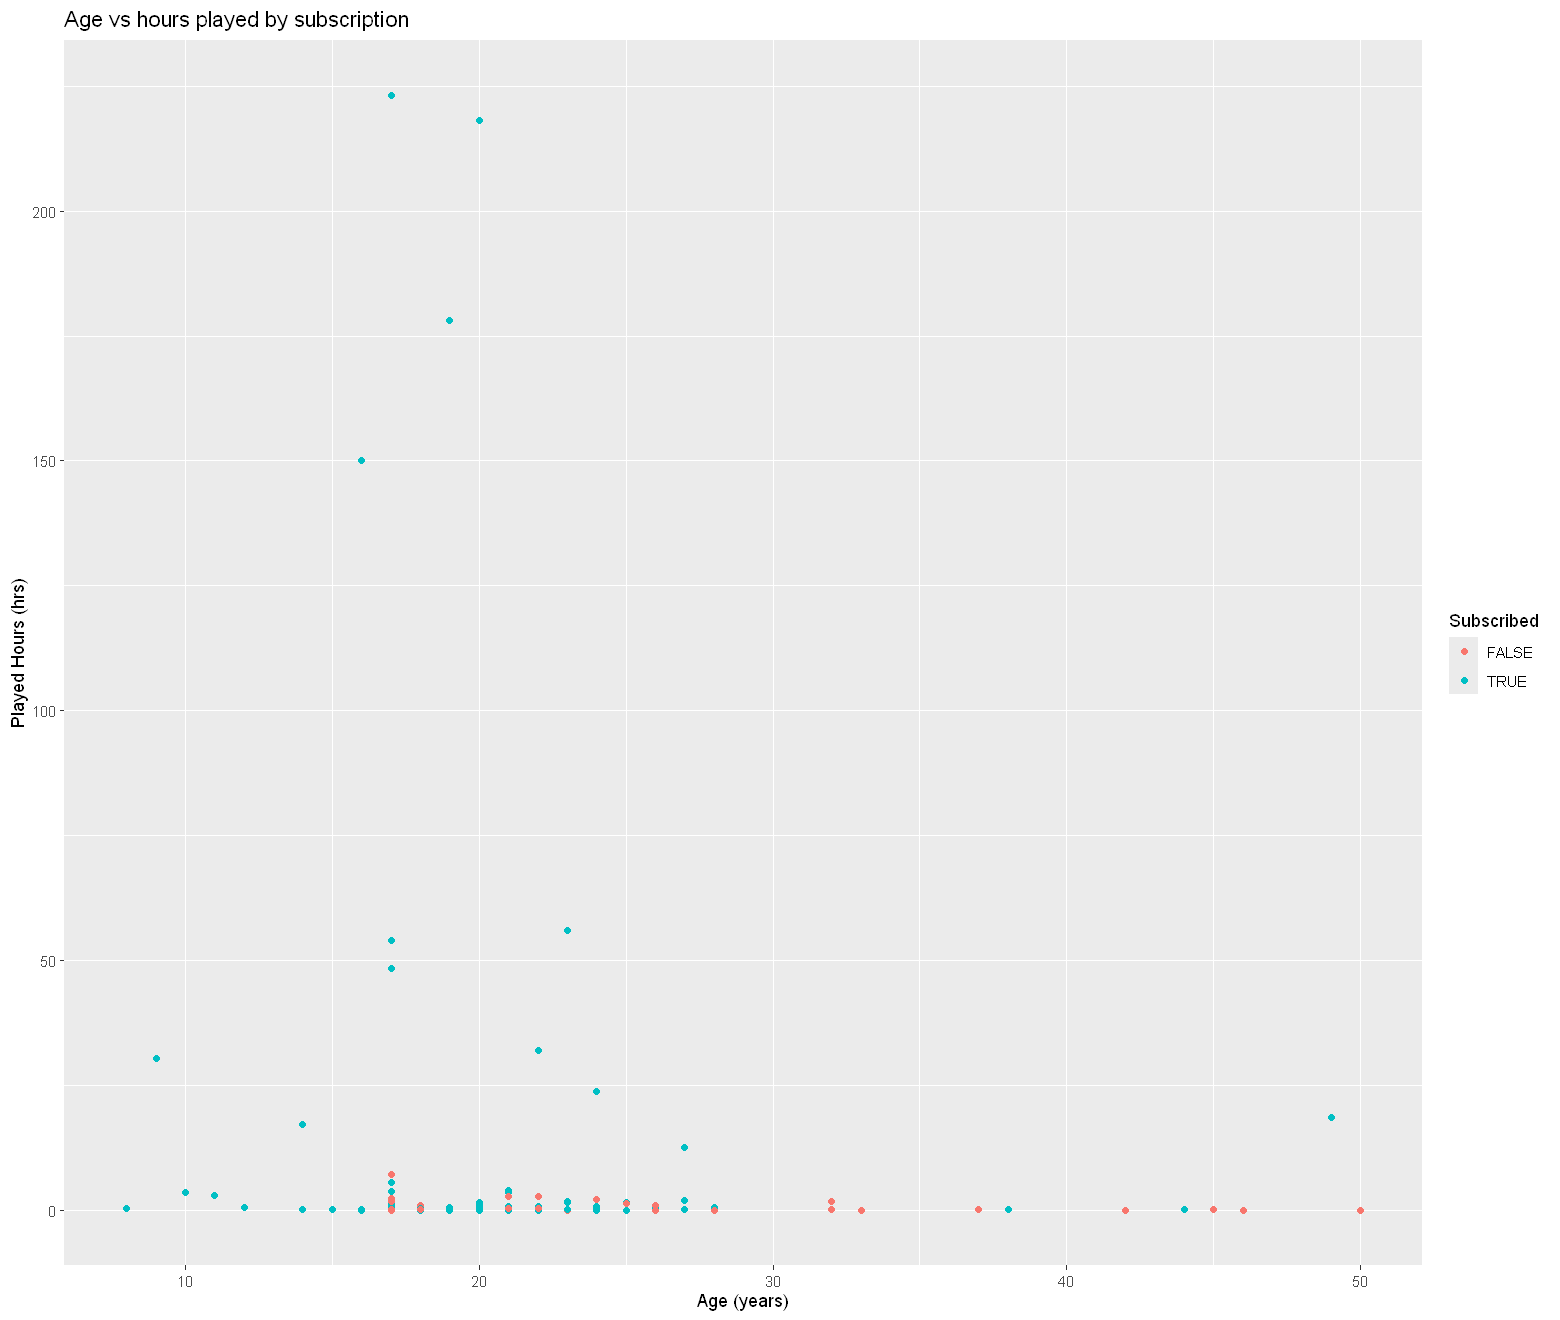

In [7]:
options(repr.plot.width = 13, repr.plot.height = 11)

age_hours_plot <- ggplot(players, aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point() +
  labs(x = "Age (years)", 
       y = "Played Hours (hrs)",
       color = "Subscribed") +
    ggtitle("Age vs hours played by subscription")
age_hours_plot

This plot indicate that there is no clear relationship between Age and Played Hours. This might indicate that these two predictive variables doens't interact in a meaningful way to affect the response variable _subscribe_.

**(2) Relationship between _Age_ and Number of subscriptions (bar plot)**

`summarise()` has grouped output by 'Age'. You can override using the `.groups` argument.


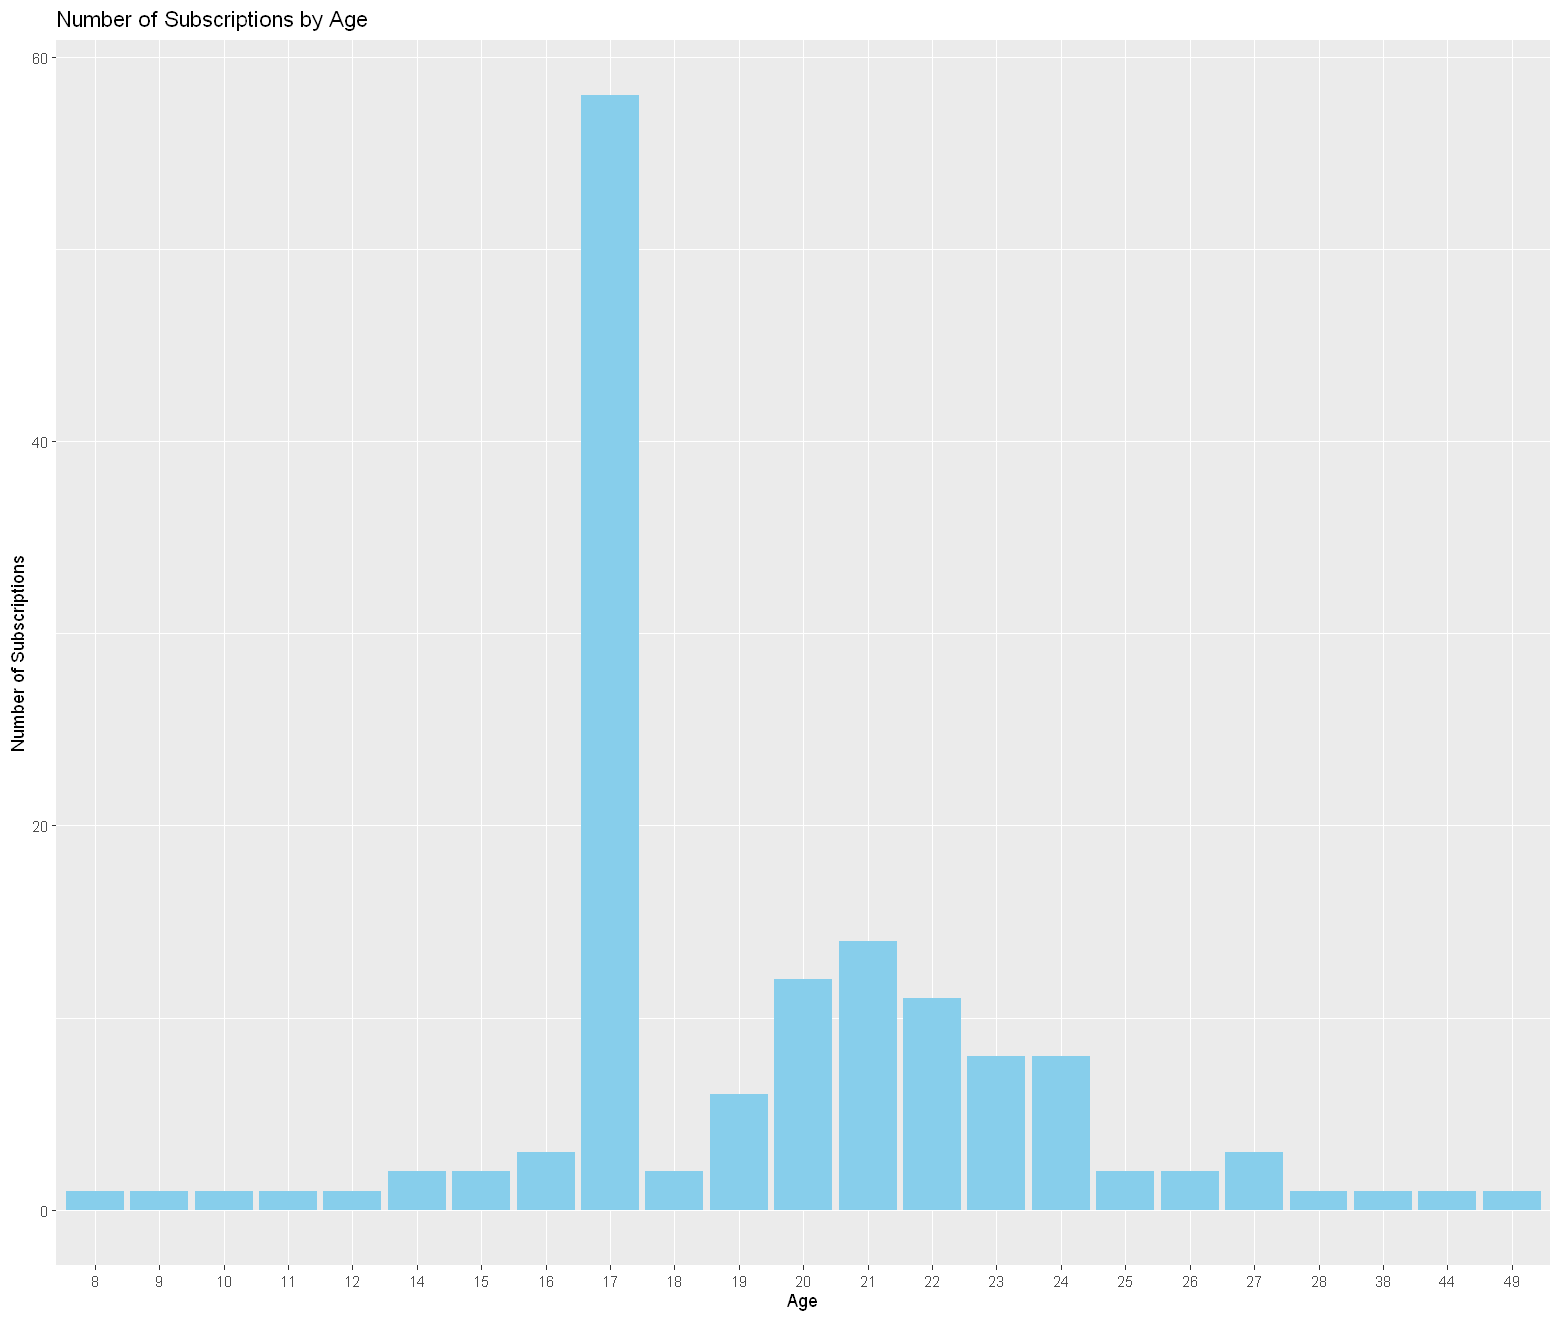

In [8]:
options(repr.plot.width = 13, repr.plot.height = 11)

age_sub_num <- players |>
    filter(subscribe == TRUE) |>
    group_by(Age, subscribe) |>
    summarise(subscribe_num = n()) 

age_dist_plot <- ggplot(age_sub_num, aes(x = as.factor(Age), y = subscribe_num)) +
    geom_bar(stat = "identity", fill = "skyblue") +
    labs(x = "Age",
        y = "Number of Subscriptions") +
    ggtitle("Number of Subscriptions by Age")

age_dist_plot

This plot explores how many players in each age group have subscribed the newsletter. Some age groups have a significantly higher subscription numbers than the others (such as 17, 21, 21, etc.), indicating that Age could be an important predictor of whether a player subscribes the newsletter.

### 4. Method and Plan

I would use **K Nearest Neighbor classfication** to predict whether a player subscribes the game newletter, based on _Age_ and _played_hours_.

* Reason of choosing K-nn: K-nn classification is useful when predicting a binary outcome. K-nn is straightforward and effective. By using K-nn, we can predicts the class of a data point based on its K nearest neighbors. 
* Assumptions required for model: The predictive variables (_Age_ and _played_hours_) should be centered and scaled, ensuring they contribute equally to the result and there is no one single variable that dominates the result.
* Potential limitations: After scaling and centering the data, k-nn will consider all the variables equally. This means that irrelevant or redundant variables can negatively impact performance by producing noise. 
* How to compare and select the model: Use cross validation to choose the optimal K value that balances overfitting and underfitting, ensuring a accurate model. Also, use confusion matrix, accuracy, precision, and recall to evaluate the model and select the best model.
* How to process data: Split the data into 70% training set and 30% testing set. Additionally, use cross validation to choose the best K value.